1\. Fodrászonként mekkora Bevételt produkált a szalon, illetve mennyi az össz bevétel

2.Picit bonyolultabban --\> Fodrászonként és szolgáltatásonként a bevétel összege

In [ ]:
select IIF(GROUPING(fodraszok.nev) = 1, 'Összesen', fodraszok.nev) AS 'Fodrász neve',
       SUM(szolgaltatasok.ar*kedvezmeny.szazalek) AS 'Bevétel'
FROM foglalasok join fodraszok on foglalasok.fodrasz_fk = fodraszok.fodrasz_id
				join foglalas_szolgaltatas on foglalasok.foglalas_id = foglalas_szolgaltatas.foglalas_fk
                join szolgaltatasok on foglalas_szolgaltatas.szolgaltatas_fk = szolgaltatasok.szolgaltatas_id
                join kedvezmeny on kedvezmeny.kedvezmeny_id = szolgaltatasok.kedvezmeny_fk
group by rollup(fodraszok.nev)

-------------------------------------------------------------------------------------------------------------------

SELECT IIF(GROUPING_ID(fodraszok.nev) = 1, 'Végösszeg',fodraszok.nev) as 'Fodrász neve',
        CASE 
        when grouping_id(fodraszok.nev, szolgaltatasok.megnevezes) = 1 THEN 'Részösszeg'
        when grouping_id(fodraszok.nev, szolgaltatasok.megnevezes) = 3 THEN 'Végösszeg'
        else szolgaltatasok.megnevezes
        end as 'Szolgáltatás neve',
        SUM(szolgaltatasok.ar*kedvezmeny.szazalek) AS 'Bevétel'
FROM foglalasok join fodraszok on foglalasok.fodrasz_fk = fodraszok.fodrasz_id
				join foglalas_szolgaltatas on foglalasok.foglalas_id = foglalas_szolgaltatas.foglalas_fk
                join szolgaltatasok on foglalas_szolgaltatas.szolgaltatas_fk = szolgaltatasok.szolgaltatas_id
                join kedvezmeny on kedvezmeny.kedvezmeny_id = szolgaltatasok.kedvezmeny_fk
group by rollup(fodraszok.nev,szolgaltatasok.megnevezes)


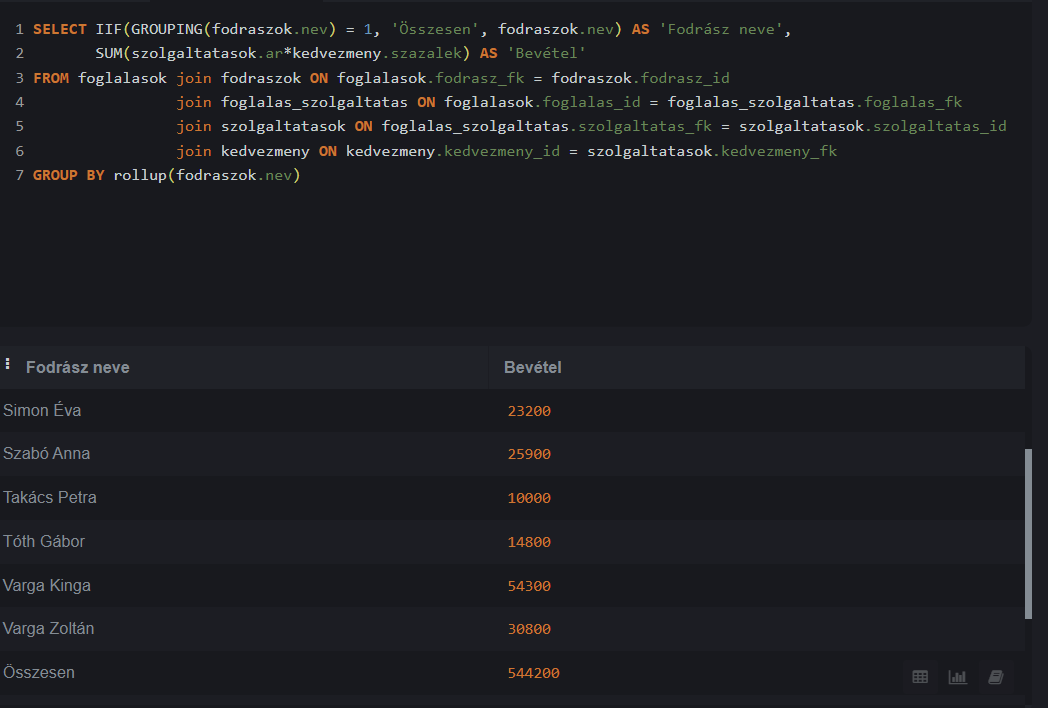

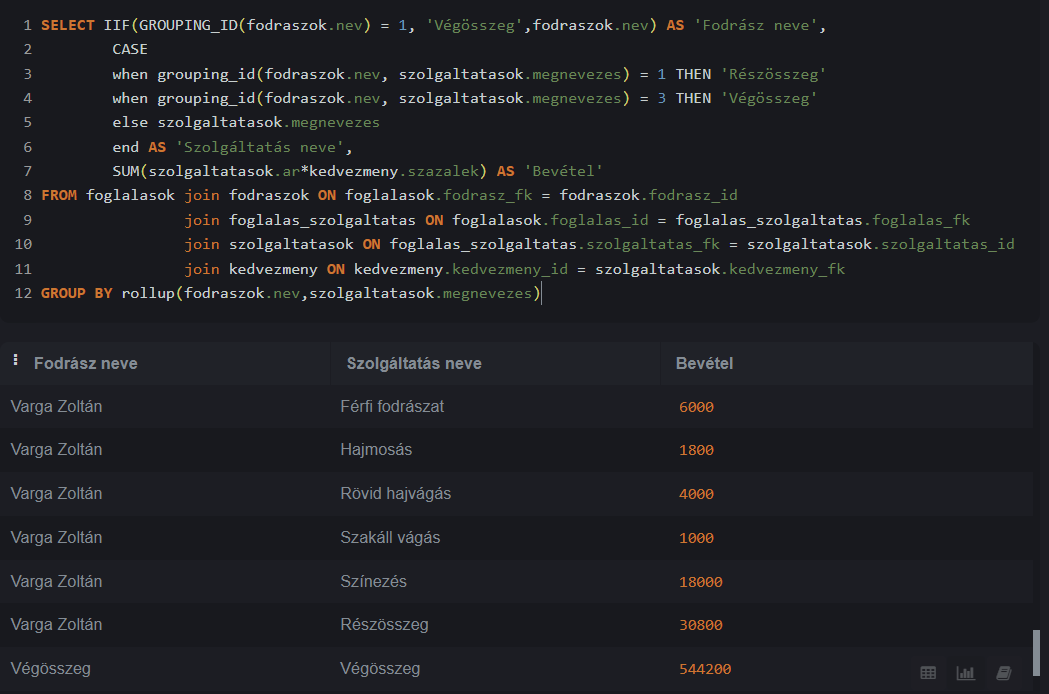

<span style="color: #09885a;">3</span>. Foglalások száma fizetési mód szerint

In [ ]:
select IIF(GROUPING(fizetesi_mod) = 1, 'Összesen', fizetesi_mod) as 'Fizetési mód',
		Count(*) as 'DB'
from foglalasok
group by ROLLUP(fizetesi_mod)

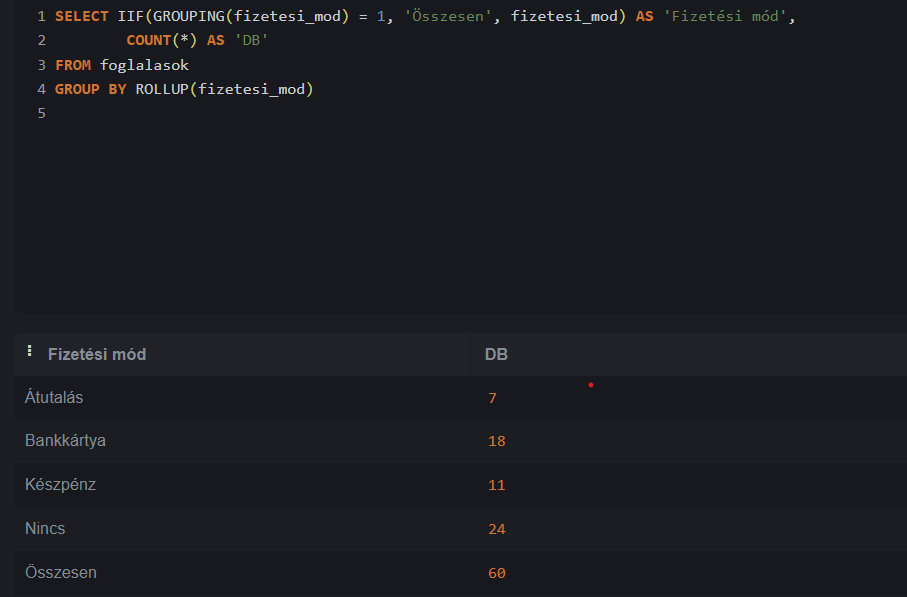

4\. Szolgáltatások árkategóriába sorolása

In [ ]:
SELECT megnevezes as 'Megnevezés', ar as 'Ár',
    CASE 
        WHEN ar < 5000 THEN 'Olcsó árkategória'
        WHEN ar >= 5000 AND ar < 10000 THEN 'Közepes árkategória'
        WHEN ar >= 10000 THEN 'Drága árkategória'
    END AS 'Árkategória'
FROM szolgaltatasok

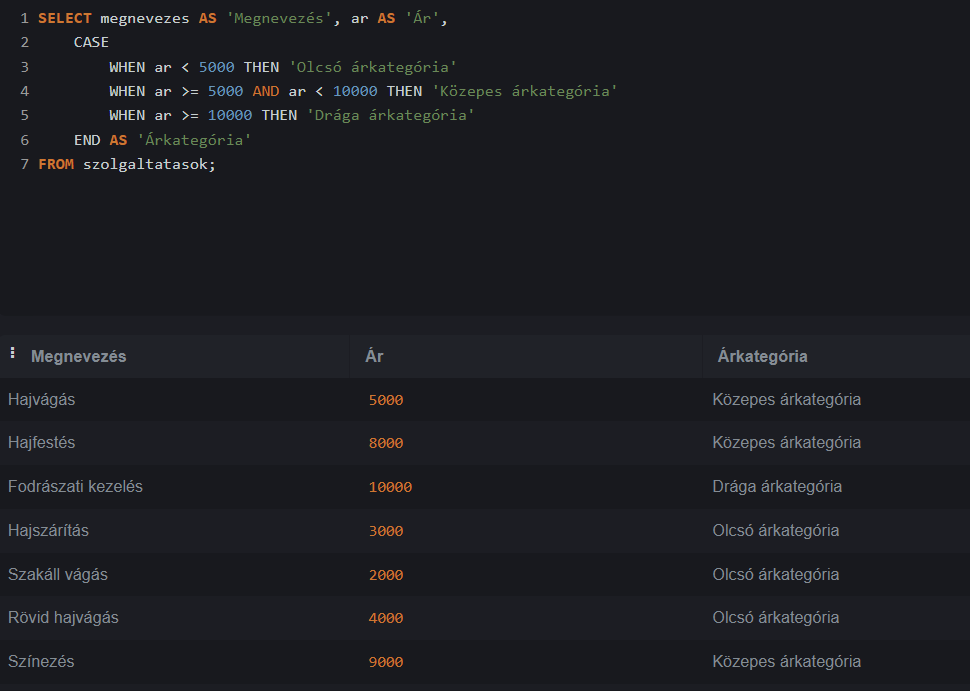

5. Azoknak a foglalásoknak a listája, amelyekhez kapcsolódik kedvezmény

In [ ]:
SELECT f.foglalas_id, sz.megnevezes, sz.ar, k.szazalek
FROM foglalas_szolgaltatas fsz JOIN foglalasok f ON fsz.foglalas_fk = f.foglalas_id
                                JOIN szolgaltatasok sz ON fsz.szolgaltatas_fk = sz.szolgaltatas_id
                                JOIN kedvezmeny k ON sz.kedvezmeny_fk = k.kedvezmeny_id
WHERE k.szazalek < 1.0

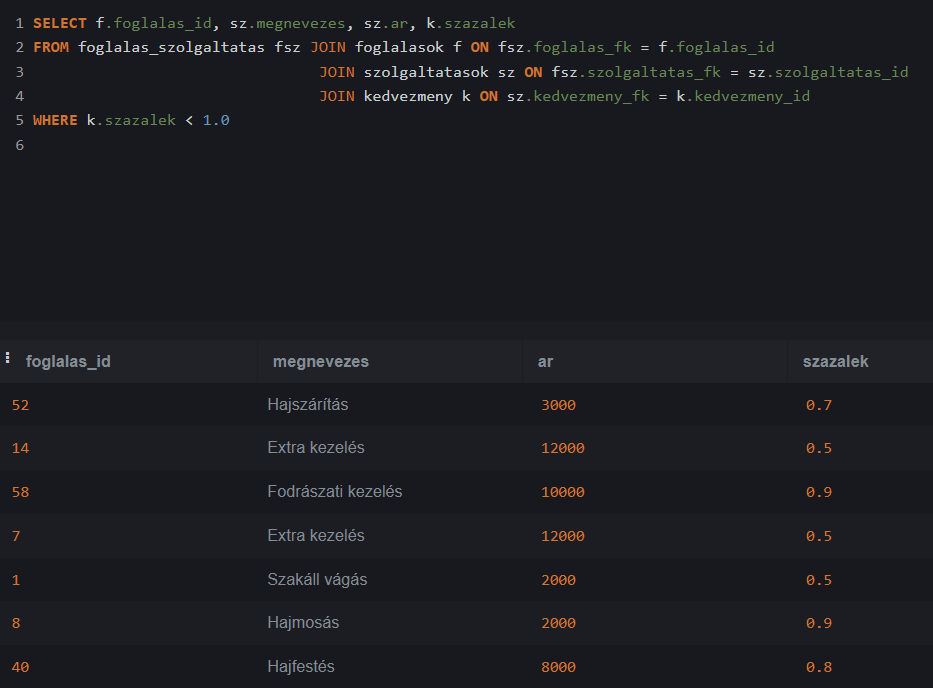

6. Hány olyan rendelés van ahol a foglalás kezdete eltér a tényleges kezdétől

In [ ]:
SELECT COUNT(*) AS "Eltérések száma"
FROM foglalasok
WHERE idopont != kezdes;

![Nincs elérhető leírás.](https://scontent-vie1-1.xx.fbcdn.net/v/t1.15752-9/441963811_1116641749403966_540899866820457150_n.png?_nc_cat=105&ccb=1-7&_nc_sid=5f2048&_nc_ohc=B7ELwt3Q8HAQ7kNvgHo8qJU&_nc_ht=scontent-vie1-1.xx&oh=03_Q7cD1QGZn4vKcRi1ZqvePJVWsDwHu4-7SzcLFkCCD3A0U7ryWA&oe=6669840C)

7. A mai napon melyik fodrászoknak milyen időpontja lesz

In [ ]:
SELECT fd.nev AS 'Fodrász',
		f.idopont AS 'Időpont',
        u.nev AS 'Ügyfél',
        sz.megnevezes AS 'Szolgáltatás'
FROM foglalasok f JOIN fodraszok fd ON f.fodrasz_fk = fd.fodrasz_id
					JOIN ugyfelek u ON f.ugyfel_fk = u.ugyfel_id
                    JOIN  foglalas_szolgaltatas fsz ON f.foglalas_id = fsz.foglalas_fk
                    JOIN szolgaltatasok sz ON fsz.szolgaltatas_fk = sz.szolgaltatas_id
WHERE CONVERT(DATE, f.idopont) = CONVERT(DATE, GETDATE());

![Nincs elérhető leírás.](https://scontent-vie1-1.xx.fbcdn.net/v/t1.15752-9/436616824_2085847431801322_8450018736212734062_n.png?_nc_cat=100&ccb=1-7&_nc_sid=5f2048&_nc_ohc=WAxdN_hJEvkQ7kNvgEFfy-P&_nc_ht=scontent-vie1-1.xx&oh=03_Q7cD1QEHiWnSg6WXn-Wnp-ngC9GkId9jk7ZI0CNTfXUg-8nUDg&oe=6669749D)